### Read nrrd files to collect segmentation data

In [2]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt


In [3]:
# Some sample numpy data
data = np.zeros((5,4,3,2))
filename = 'testdata.nrrd'

# Write to a NRRD file
nrrd.write(filename, data)

# Read the data back from file
readdata, header = nrrd.read(filename)
print(readdata.shape)
print(header)

(5, 4, 3, 2)
OrderedDict([('type', 'double'), ('dimension', 4), ('sizes', array([5, 4, 3, 2])), ('endian', 'little'), ('encoding', 'gzip')])


In [4]:
print(readdata)

[[[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]]


### Test new code on provided example

In [5]:
# Segmentation example file name
filename = 'Segmentation_1.seg.nrrd'

# Read the data back from file
readdata, header = nrrd.read(filename)

In [6]:
print(readdata.shape)

(2304, 2304, 140)


In [7]:
print(readdata)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
np.isin(1, readdata)

array(True)

In [10]:
np.unique(readdata)

array([0, 1, 2, 3, 4], dtype=uint8)

### Read original .tif lightsheet scan

In [1]:
filename = 't0001_a647.tif'
og_tif = plt.imread(filename)
og_tif.shape

NameError: name 'plt' is not defined

### Compare both variables

In [17]:
print("Original tif image shape : ", og_tif.shape)
print("Segmentation nrrd shape : ", readdata.shape)

Original tif image shape :  (2304, 2304)
Segmentation nrrd shape :  (2304, 2304, 140)


In [ ]:
import os
from PIL import Image

yourpath = os.getcwd()
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else :
                outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"

In [4]:
from PIL import Image
import os

def jpg_to_tiff(jpg_folder, tiff_file):
    # Get a list of JPEG files in the folder
    jpg_files = [f for f in os.listdir(jpg_folder) if f.endswith('.jpg')]
    jpg_files.sort()  # Sort the files to maintain order
    
    # Open the first JPEG file to get image properties
    first_img = Image.open(os.path.join(jpg_folder, jpg_files[0]))
    mode = first_img.mode
    size = first_img.size
    
    # Create a new multi-page TIFF file
    tiff = Image.new(mode, size, None)
    
    # Loop through JPEG files and append to the TIFF file
    for jpg_file in jpg_files:
        jpg_path = os.path.join(jpg_folder, jpg_file)
        img = Image.open(jpg_path)
        
        # If images have different modes or sizes, raise an error
        if img.mode != mode or img.size != size:
            raise ValueError("Images must have the same mode and size.")
        
        # Append the current image to the TIFF file
        tiff.save(tiff_file, append=True)
    
    # Close the TIFF file
    tiff.close()

# Example usage
jpg_to_tiff("frames/", "output.tiff")

FileNotFoundError: [Errno 2] No such file or directory: 'output.tiff'

## Proper JPG Format

In [10]:
import numpy as np

def compute_MI(image):
    # Convert image to uint8 type
    if image.dtype != np.uint8:
        image = (image / (np.max(image) / 255)).astype(np.uint8)

    return image

In [14]:
from PIL import Image
import os


"""
TIF TO JPG CONVERTER
"""

def tiff_to_jpg(tiff_file, output_path):
    # Open the TIFF file
    tiff_img = Image.open(tiff_file)

    # Loop through each page and save as JPEG
    for i in range(tiff_img.n_frames):
        # Go to the i-th page
        tiff_img.seek(i)

        # # Get the directory part of the output path
        # output_dir = os.path.dirname(output_path)

        # # Create the directory if it doesn't exist
        # os.makedirs(output_dir, exist_ok=True)
        
        # Convert image to 8-bit grayscale mode ('L')
        converted_img = np.array(tiff_img)

        # Convert Imaget to proper format :
        converted_img = Image.fromarray(compute_MI(converted_img))
        
        # Save the current page as JPEG
        converted_img.save(f"{output_path}/page_{i+1}.jpg", format="JPEG")

# Example usage
tiff_to_jpg("t0001_Channel 3.tif", "frames/frames_1")

## SAM 

In [12]:
import os
# from IPython.display import Image
from PIL import Image as Image
from ultralytics.models.sam import Predictor as SAMPredictor

In [9]:
# Create SAMPredictor
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=1024, model="mobile_sam.pt")
predictor = SAMPredictor(overrides=overrides)

In [10]:
# Segment full image
results = predictor(source="frames/frames_1/page_53.jpg", crop_n_layers=1, points_stride=64)

for i, result in enumerate(results):
    filename = f'result_{i}.jpg'
    result.save(filename)
    display(Image(filename=filename))
    os.remove(filename)


Ultralytics YOLOv8.0.145  Python-3.7.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
image 1/1 c:\Users\alyel\Desktop\EPFL\MA4\Semester Project II\Machine Learning\frames\frames_1\page_53.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 975531.2ms
Speed: 27.6ms preprocess, 975531.2ms inference, 7.8ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs\segment\predict3


AttributeError: 'Results' object has no attribute 'save'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference and postprocess speeds in milliseconds per image.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [14]:
# Assuming `results` is a list of Ultralytics Results objects
for i, result in enumerate(results):
    filename = f'result_{i}.jpg'
    # Access the original image from the Results object
    
    orig_img = result.orig_img
    # Convert the image from tensor to PIL Image
    orig_img_pil = Image.fromarray(orig_img)
    # Save the image
    orig_img_pil.save(filename)
    # display(Image(filename=filename))
    os.remove(filename)

## TIF INTO MULTI TIF

In [3]:
from wand.image import Image
import os

def split_multi_page_tiff(input_file, output_folder, output_prefix):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with Image(filename=input_file) as img:
        for i, page in enumerate(img.sequence):
            with Image(page) as single_img:
                output_path = os.path.join(output_folder, f"{output_prefix}_{i}.tif")
                single_img.save(filename=output_path)

# Example usage
input_file = "t0001_Channel 3.tif"  # Replace with the path to your multi-page TIFF file
output_folder = "tif_indiv_test"  # Folder to save output files
output_prefix = "single"  # Prefix for output file names
split_multi_page_tiff(input_file, output_folder, output_prefix)


## READ AND DISPLAY NRRD

In [1]:
import SimpleITK as sitk

# Load NRRD file
nrrd_path = "path_to_your_file.nrrd"
image = sitk.ReadImage(nrrd_path)

# Display image
sitk.Show(image)


ModuleNotFoundError: No module named 'SimpleITK'

In [4]:
!pip install nibabel


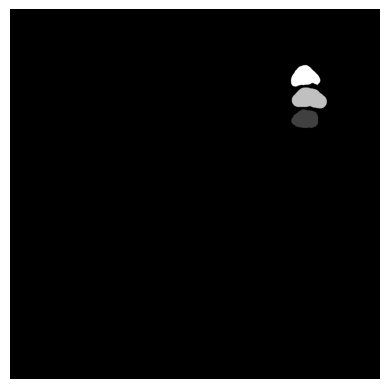

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nrrd

def load_nrrd(file_path):
    data, _ = nrrd.read(file_path)
    return data

def view_nrrd(data):
    plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage
nrrd_file_path = "Segmentation_1.seg.nrrd"
nrrd_data = load_nrrd(nrrd_file_path)
view_nrrd(nrrd_data)


In [10]:
import nrrd
import os
import numpy as np
from PIL import Image

def load_nrrd(file_path):
    data, _ = nrrd.read(file_path)
    return data

def save_frames_as_tiff(data, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    num_frames = data.shape[2]
    for i in range(num_frames):
        frame_data = data[:, :, i]
        
        # Normalize data to 0-255 range
        normalized_frame = ((frame_data - np.min(frame_data)) / (np.max(frame_data) - np.min(frame_data)) * 255).astype(np.uint8)
        
        # Convert to PIL Image
        frame_image = Image.fromarray(normalized_frame)
        
        # Save as TIFF file
        frame_image.save(os.path.join(output_folder, f"frame_{i}.tif"))

# Example usage
nrrd_file_path = "Segmentation_1.seg.nrrd"
output_folder = "seg_labels_test"
nrrd_data = load_nrrd(nrrd_file_path)
save_frames_as_tiff(nrrd_data, output_folder)


c:\Users\alyel\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


## GENERATE TRAINING DATA FROM TIF AND NRRD FILES

In [29]:
import numpy as np

nrrd_data = load_nrrd(nrrd_file_path)

def rotate_data(data, angle):
    # Rotate the data by the specified angle
    rotated_data = np.rot90(data, k=angle//90, axes=(0, 1))  # Adjust axes if needed
    return rotated_data

def flip_data(data, axes):
    # Flip the data along the specified axes
    flipped_data = np.flip(data, axis=axes)
    return flipped_data

def rotate_around_middle_vertical_axis(data, angle):
    # Calculate the middle index along the vertical axis
    middle_vertical_index = data.shape[0] // 2
    
    # Rotate the data around the middle vertical axis
    rotated_data = np.rot90(data, k=angle // 90, axes=(0, 1))
    
    # Flip the rotated data along the vertical axis to align with the original orientation
    rotated_data = np.flip(rotated_data, axis=0)
    
    return rotated_data

# Example usage for rotation around the middle vertical axis
angle = 90  # Rotation angle (in degrees)
rotated_data = rotate_around_middle_vertical_axis(nrrd_data, angle)

# Example usage for rotation
angle = 90  # Rotation angle (in degrees)
rotated_data = rotate_data(nrrd_data, angle)

# Example usage for flipping
axes_to_flip = (0, 1)  # Axes along which to flip (e.g., (0, 1) for flipping along X and Y axes)
flipped_data = flip_data(nrrd_data, axes_to_flip)




In [46]:
from wand.image import Image as WandImage
import os
import nrrd
import numpy as np
from PIL import Image as PilImage

"""
TIF input files
"""
def split_multi_page_tiff(input_file, output_folder, file_prefix):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with WandImage(filename=input_file) as img:
        for i, page in enumerate(img.sequence):
            with WandImage(page) as single_img:
                output_path = os.path.join(output_folder, f"{file_prefix}_frame_{i}.tif")
                single_img.save(filename=output_path)


"""
TIF Mask Labels
"""
def load_nrrd(file_path):
    data, _ = nrrd.read(file_path)
    return data

def save_frames_as_tiff(data, output_folder, file_prefix):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    num_frames = data.shape[2]
    for i in range(num_frames):
        frame_data = data[:, :, i]
        
        # Normalize data to 0-255 range
        normalized_frame = ((frame_data - np.min(frame_data)) / (np.max(frame_data) - np.min(frame_data)) * 255).astype(np.uint8)
        
        # Convert to PIL Image
        frame_image = PilImage.fromarray(normalized_frame)
        
        # Save as TIFF file
        frame_image.save(os.path.join(output_folder, f"{file_prefix}_frame_{i}_mask.tif"))

def rotate_around_middle_horizontal_axis(data, angle):
    # Get the height and width of each frame
    height, width, num_frames = data.shape
    
    # Calculate the middle index along the horizontal axis for each frame
    middle_horizontal_indices = width // 2
    
    # Initialize an array to store the rotated data
    rotated_data = np.empty_like(data)
    
    # Iterate over each frame
    for i in range(num_frames):
        # Rotate the data within the frame around the middle horizontal axis
        rotated_frame = np.rot90(data[:, :, i], k=angle // 90, axes=(1, 0))
        
        # Flip the rotated frame along the horizontal axis to align with the original orientation
        rotated_frame = np.flip(rotated_frame, axis=1)
        
        # Store the rotated frame in the output array
        rotated_data[:, :, i] = rotated_frame
    
    return rotated_data


"""
MEGA FUNCTION FOR DATA
"""
def generate_data_folder (tif_file_path, nrrd_file_path, zebrafish_number) :
    folder = f"data_train/zebrafish_{zebrafish_number}"
    file_prefix = f"zebrafish_{zebrafish_number}"
    nrrd_data = load_nrrd(nrrd_file_path)
    
    # PROPER ROTATION CONFIGURATION 
    nrrd_data = rotate_data(nrrd_data, 90)
    nrrd_data = rotate_around_middle_horizontal_axis(nrrd_data, 180)

    # Input frames
    split_multi_page_tiff(tif_file_path, folder, file_prefix)

    # Corresponding Masks
    save_frames_as_tiff(nrrd_data, folder, file_prefix)

input_file_path = "t0001_a647.tif"
nrrd_file_path = "Segmentation_1.seg.nrrd"

generate_data_folder(input_file_path, nrrd_file_path, zebrafish_number="FINAL")



c:\Users\alyel\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


In [2]:
from generate_data_folder import generate_data_folder

input_file_path = "t0001_a647.tif"
nrrd_file_path = "Segmentation_1.seg.nrrd"

generate_data_folder(input_file_path, nrrd_file_path, zebrafish_number="ULTIMATE")

In [20]:
def check_metadata(file_path):
    # Load NRRD file and check metadata
    data, header = nrrd.read(file_path)
    print("NRRD Header:")
    print(header)

# Example usage
check_metadata(nrrd_file_path)

NRRD Header:
OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([2304, 2304,  140])), ('space directions', array([[0.26458333, 0.        , 0.        ],
       [0.        , 0.26458333, 0.        ],
       [0.        , 0.        , 1.        ]])), ('kinds', ['domain', 'domain', 'domain']), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.])), ('Segment0_Color', '0.501961 0.682353 0.501961'), ('Segment0_ColorAutoGenerated', '1'), ('Segment0_Extent', '0 1221 1498 1990 39 132'), ('Segment0_ID', 'Segment_1'), ('Segment0_LabelValue', '1'), ('Segment0_Layer', '0'), ('Segment0_Name', '1'), ('Segment0_NameAutoGenerated', '0'), ('Segment0_Tags', 'Segmentation.Status:inprogress|TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~SCT^85756007^Tissue~SCT^85756007^Tissue~^^~Anatomic codes - DICOM master list~^^~^^|'), ('Segment1_Color', '0.945098 0.839216 0.568627'), ('Segment1_ColorAutoGenerated', '1'), (

In [21]:
import numpy as np

nrrd_data = load_nrrd(nrrd_file_path)

def rotate_data(data, angle):
    # Rotate the data by the specified angle
    rotated_data = np.rot90(data, k=angle//90, axes=(0, 1))  # Adjust axes if needed
    return rotated_data

def flip_data(data, axes):
    # Flip the data along the specified axes
    flipped_data = np.flip(data, axis=axes)
    return flipped_data

# Example usage for rotation
angle = 90  # Rotation angle (in degrees)
rotated_data = rotate_data(nrrd_data, angle)

# Example usage for flipping
axes_to_flip = (0, 1)  # Axes along which to flip (e.g., (0, 1) for flipping along X and Y axes)
flipped_data = flip_data(nrrd_data, axes_to_flip)


# MULTI MASK

In [9]:
import os
import numpy as np
import nrrd
from PIL import Image
# from generate_data_folder import rotate_data
# from generate_data_folder import rotate_around_middle_horizontal_axis


def rotate_around_middle_horizontal_axis(data, angle):
    # Get the height and width of each frame
    height, width = data.shape
    
    # Calculate the middle index along the horizontal axis for each frame
    middle_horizontal_indices = width // 2
    
    # Rotate the data within the frame around the middle horizontal axis
    rotated_frame = np.rot90(data, k=angle // 90, axes=(1, 0))
    
    # Flip the rotated frame along the horizontal axis to align with the original orientation
    rotated_frame = np.flip(rotated_frame, axis=1)
    
    return rotated_frame

# Define the rotate_data function
def rotate_data(data, angle):
    # Rotate the data by the specified angle
    rotated_data = np.rot90(data, k=angle // 90, axes=(0, 1))
    return rotated_data

# Create a folder to save the images
output_folder = 'multi_mask'
os.makedirs(output_folder, exist_ok=True)

# Load the .nrrd file
data, header = nrrd.read('Segmentation_1_smoothed.seg.nrrd')

# Determine the maximum number of masks in any frame
max_masks = np.max(data)

# Specify the rotation angle
rotation_angle = 90  # Example rotation angle

# Iterate through each frame
for frame_index in range(data.shape[2]):
    frame = data[:, :, frame_index]

    # Apply both rotation functions to the frame
    rotated_frame = rotate_data(frame, 90)
    rotated_frame = rotate_around_middle_horizontal_axis(rotated_frame, 180)

    # Create a folder for the current frame
    frame_folder = os.path.join(output_folder, f'frame_{frame_index}')
    os.makedirs(frame_folder, exist_ok=True)

    # Iterate through each possible segmentation mask index
    for segmentation_index in range(max_masks):
        segmentation_mask = np.where(rotated_frame == segmentation_index + 1, 255, 0)

        # Save each segmentation mask as an image inside the frame folder
        filename = f'segmentation_{segmentation_index}.png'
        filepath = os.path.join(frame_folder, filename)
        segmentation_image = Image.fromarray(segmentation_mask.astype(np.uint8))
        segmentation_image.save(filepath)

In [37]:
def get_bounding_box(ground_truth_map):
    '''
    This function creates varying bounding box coordinates based on the segmentation contours as prompt for the SAM model
    The padding is random int values between 5 and 20 pixels
    '''

    if len(np.unique(ground_truth_map)) > 1:

        # get bounding box from mask
        y_indices, x_indices = np.where(ground_truth_map > 0)
        x_min, x_max = np.min(x_indices), np.max(x_indices)
        y_min, y_max = np.min(y_indices), np.max(y_indices)

        # add perturbation to bounding box coordinates
        H, W = ground_truth_map.shape
        x_min = max(0, x_min - np.random.randint(5, 20))
        x_max = min(W, x_max + np.random.randint(5, 20))
        y_min = max(0, y_min - np.random.randint(5, 20))
        y_max = min(H, y_max + np.random.randint(5, 20))

        # bbox = [x_min, y_min, x_max, y_max]
        bbox = [x_min, y_min]

        return bbox
    else:
        # return [0, 0, 256, 256]
        return [256, 256]

In [38]:
frame_folder = "multi_mask/frame_57"
boxes = []

# Iterate over each file in the folder
for filename in os.listdir(frame_folder):
    # Check if the file is an image file (you can customize this condition based on your file types)
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Construct the full path to the image file
        file_path = os.path.join(frame_folder, filename)
        # Open the image and append it to the list
        image = Image.open(file_path)


        boxes.append(get_bounding_box(np.array(image)))



In [39]:
boxes

[[1266, 1130],
 [1172, 1205],
 [1335, 678],
 [1075, 1286],
 [960, 1345],
 [841, 1397],
 [713, 1413],
 [636, 1490],
 [472, 1505],
 [347, 1506],
 [256, 256]]

In [40]:
import torch
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = 'cpu'
model = SamModel.from_pretrained("facebook/sam-vit-base", ).to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

raw_image = Image.open("frames/frames_1/page_57.jpg").convert('RGB')

inputs = processor(raw_image, input_points=[[[400, 600]]], return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

print(inputs["original_sizes"].cpu())
print(inputs["reshaped_input_sizes"].cpu())

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

tensor([[2304, 2304]])
tensor([[1024, 1024]])


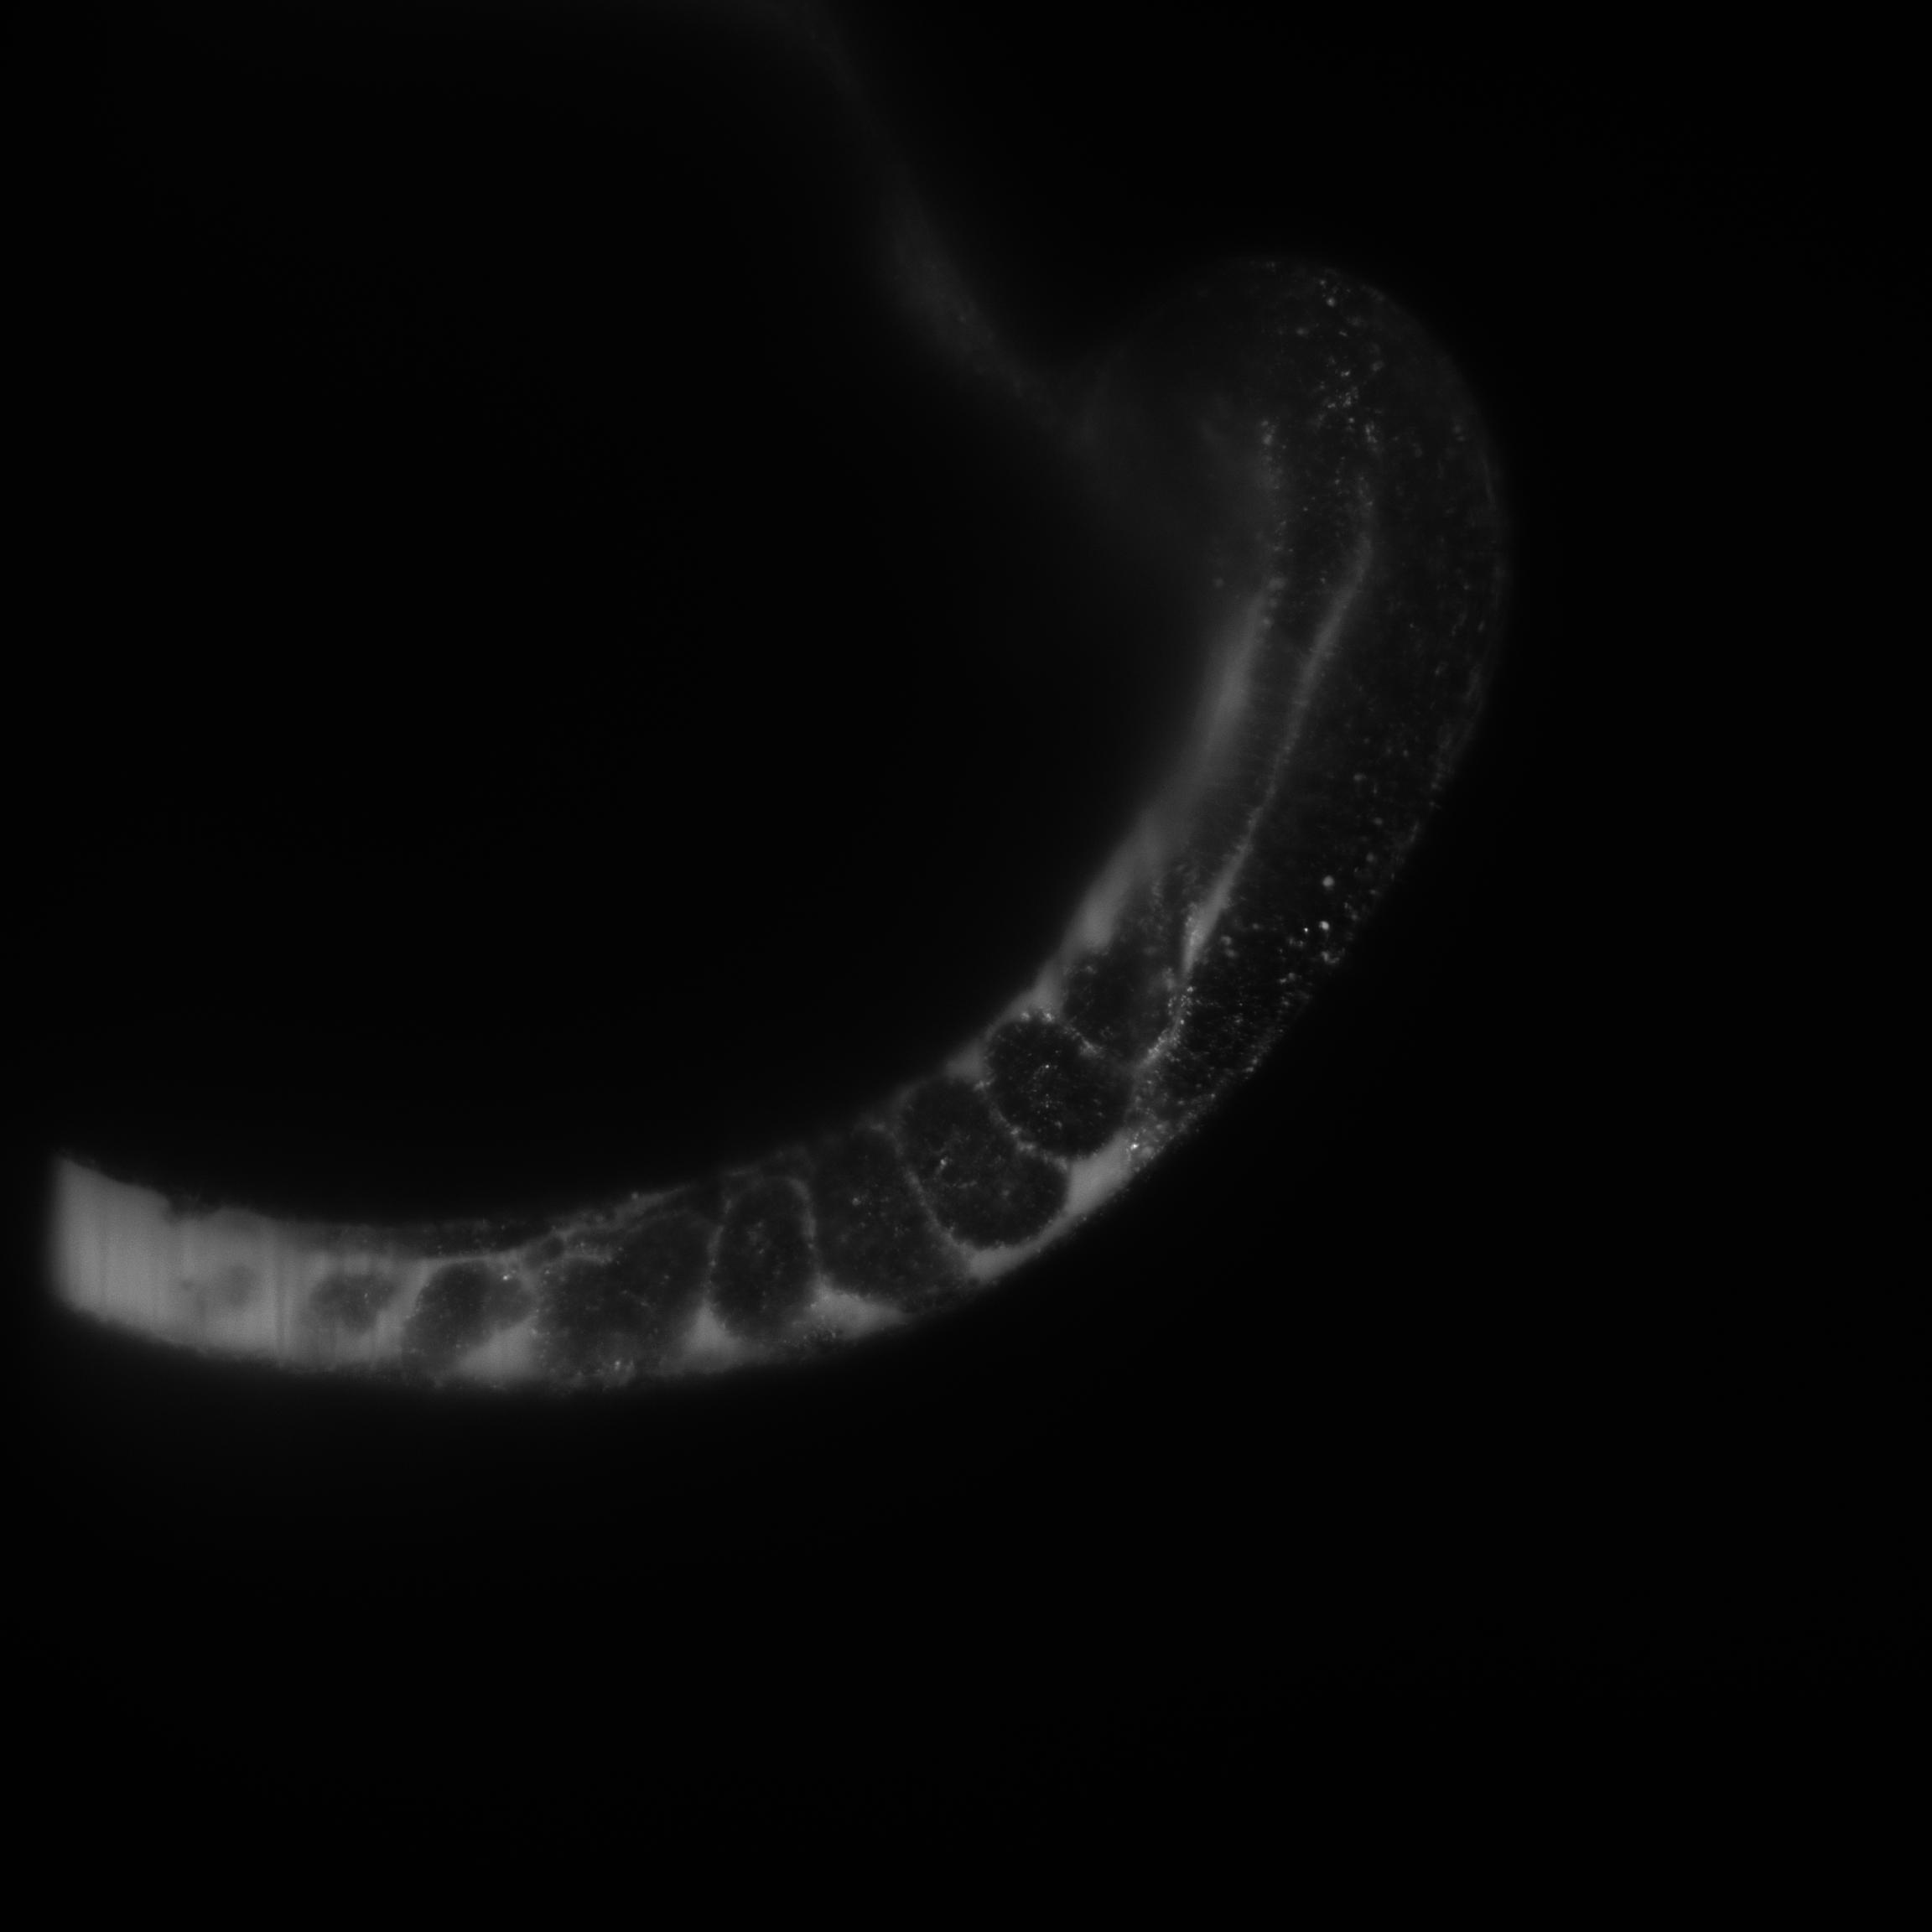

In [ ]:
raw_image

In [41]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

(2304, 2304)


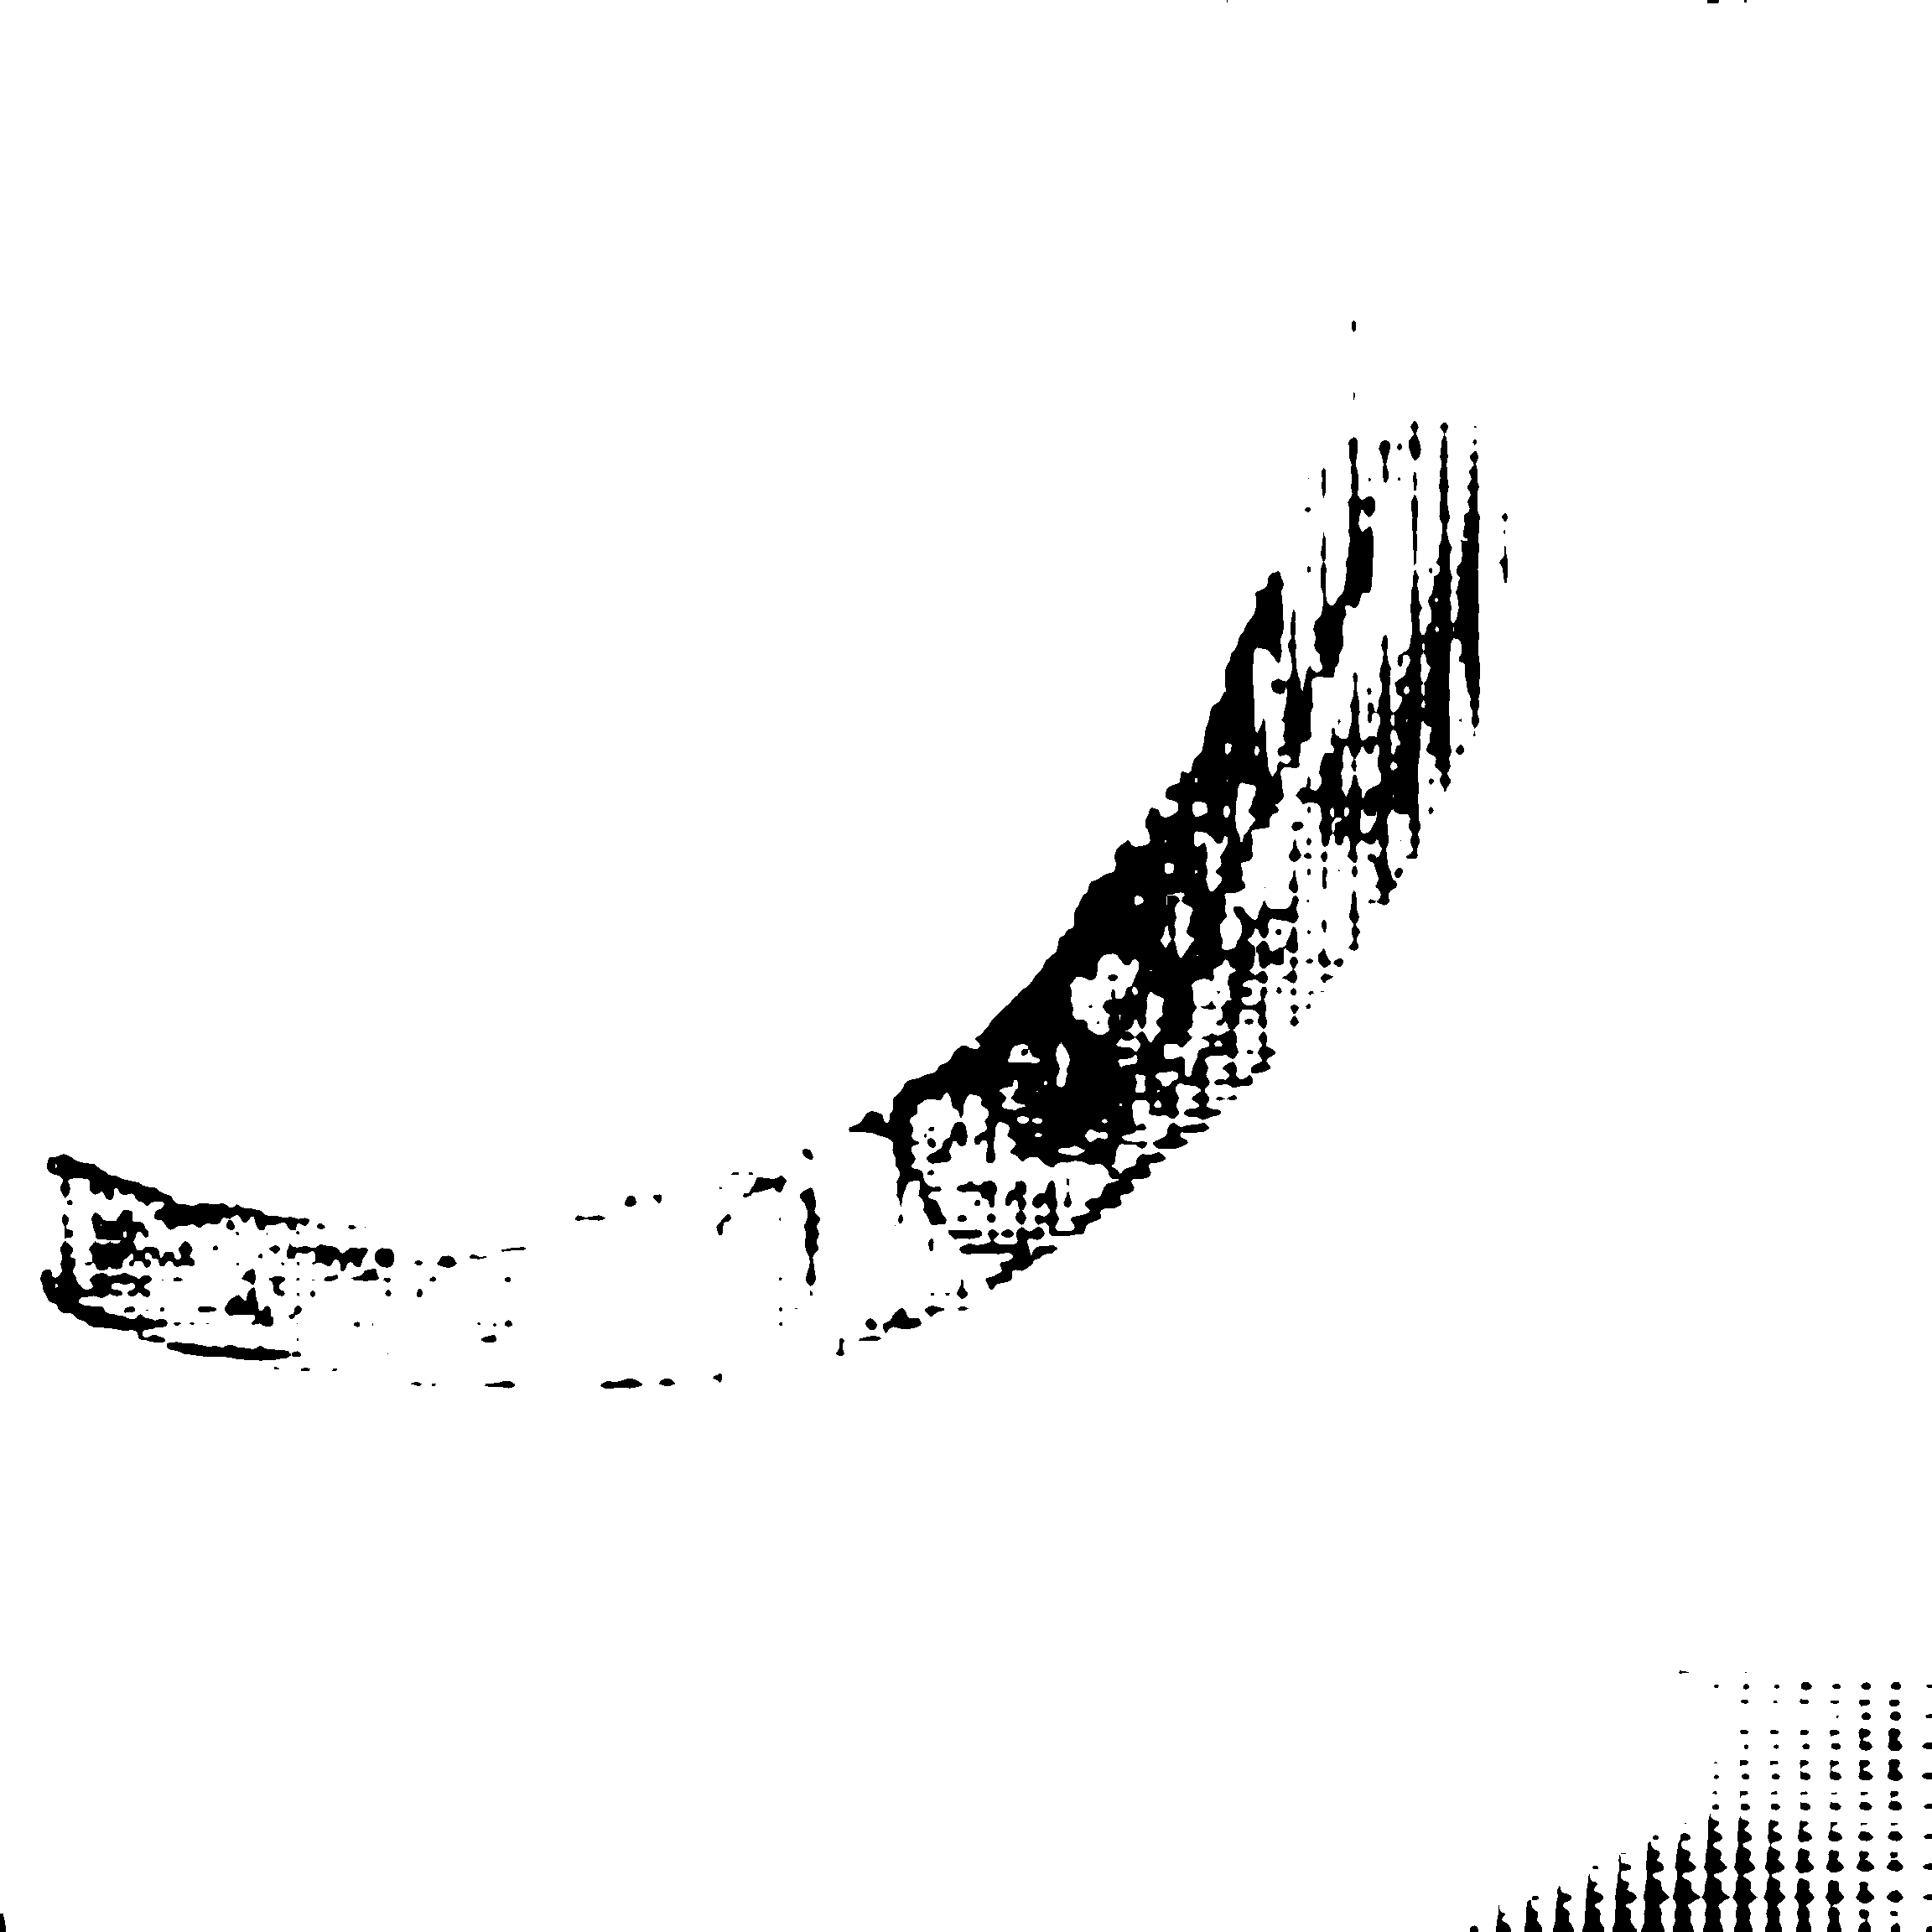

In [42]:
mask_seg = Image.fromarray((masks[0].squeeze(0)[0]).numpy())
print(mask_seg.size)
mask_seg